In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


#

In [2]:
datax = pd.read_csv("C:/Users/Student/Desktop/hourMean.csv")

#

In [3]:
data = datax.iloc[:,20:38]

#

In [4]:
data = np.array(data)

#

In [5]:
Eps = np.logspace(-2, 0, 100)
Min_samples = np.linspace(2,10,9)

#

In [6]:
eps = []
min_samples = []
scores = []
for i in Eps:
    for j in Min_samples:
        db = DBSCAN(eps=i, min_samples = j, metric='euclidean')
        y_db=db.fit_predict(data)
        if (len(set(y_db)) > 2):
            score = metrics.silhouette_score(data, db.labels_, metric='euclidean')
            eps.append(i)
            min_samples.append(j)
            scores.append(score)
            

#

In [7]:
a=eps[scores.index(max(scores))]
a

0.3944206059437656

#

In [8]:
b=min_samples[scores.index(max(scores))]
b

4.0

#

In [9]:
max(scores)

0.3101808001622926

#

In [10]:
db = DBSCAN(eps=a, min_samples =b, metric='euclidean')

#

In [11]:
y_db=db.fit_predict(data)

#

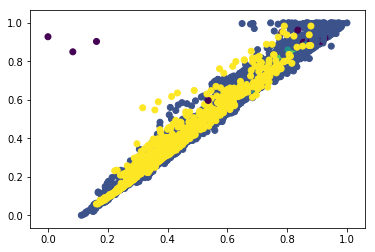

In [12]:
plt.scatter(data[:, 0], data[:, 1], c=y_db)

#

In [13]:
data1= PCA(n_components=2).fit_transform(data)

#

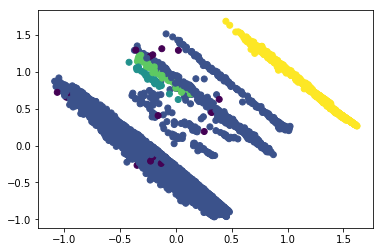

In [14]:
plt.scatter(data1[:, 0], data1[:, 1], c=y_db)

In [15]:
time = np.array(datax.iloc[:,1])

In [16]:
label2 =np.array(y_db) 

In [17]:
time1=time[1:24]

In [18]:
label3=label2[1:24]

In [19]:
set(label2)

{-1, 0, 1, 2, 3}

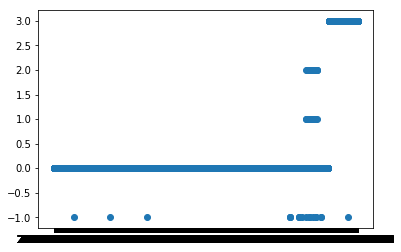

In [20]:
plt.scatter(time,label2)

In [21]:
time[0:1]

array(['2016-09-01 08'], dtype=object)